# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


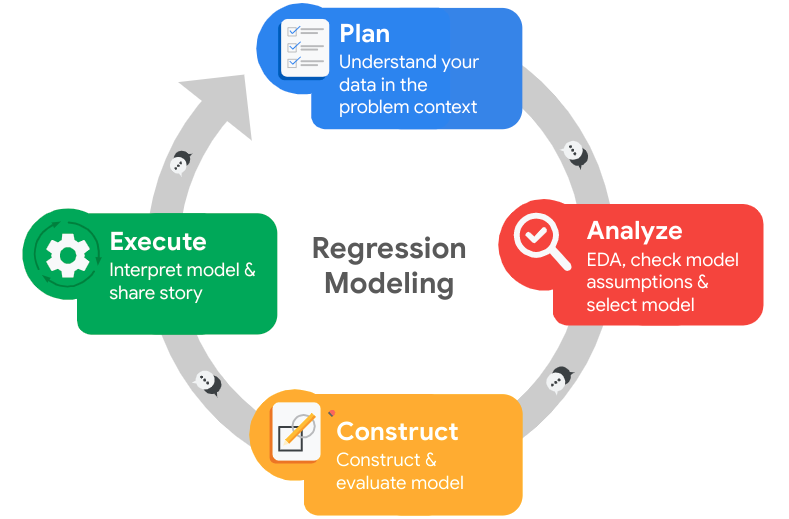

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. `Skakeholders`: Salifort motors HR depertment
2. `Goal`: Identify factors influence employees leaving the firm
3. `Resources`:
4. `Ethical consideration`: `time_spend_company` and `work_accident` may have ethical issues as the model may or may not be in favor of those whose spend few years in the company and those who had accident.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [90]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [91]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [92]:
# Gather basic information about the data
print(df0.info())
print()
print(df0.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

(14999, 10)


### Gather descriptive statistics about the data

In [93]:
# Gather descriptive statistics about the data
df0.describe(include='all')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [94]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [95]:
# Rename columns as needed
# lower case column namse to ensure consistency
cols = df0.columns
for col in cols:
    df0.rename(columns={col:col.lower()},inplace=True)
df0.rename(columns={'time_spend_company': 'tenure',
                    'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [96]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

* This output shows that there are no duplicate. This is good.

### Check duplicates

Check for any duplicate entries in the data.

In [97]:
# Check for duplicates
df0.duplicated().sum()


3008

* There are 3008 duplicates, these rows needs to be dropped.

In [98]:
# Inspect some rows containing duplicates as needed
df_duplicates = df0[df0.duplicated()]
df_duplicates.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [99]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

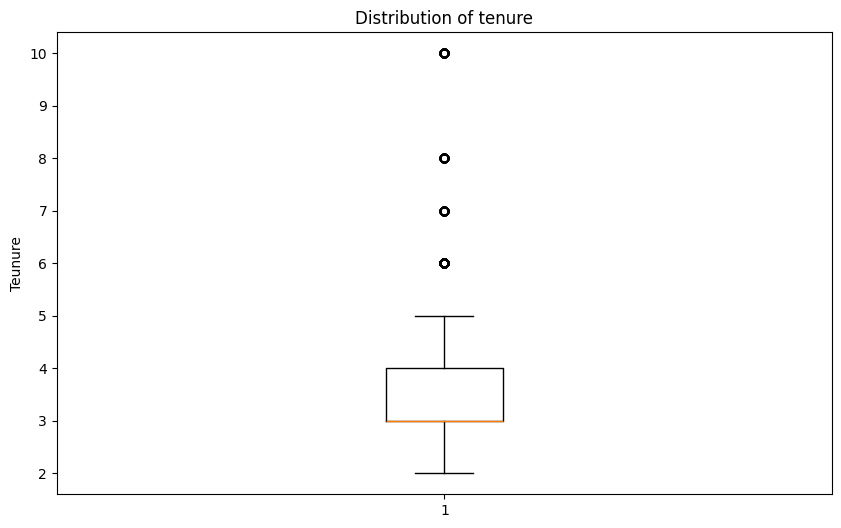

In [100]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,6))
plt.boxplot(df1['tenure'])
plt.title('Distribution of tenure')
plt.ylabel('Teunure')
plt.show()


* The box-plot shows that there are outliers in tenure. Lets investigate further.

In [101]:
# Determine the number of rows containing outliers
# determe quartiles
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (iqr * 1.5)
lower_limit = q1 - (iqr * 1.5)
outlier = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
outlier.shape


(824, 10)

This output shows that we have 824 rows that have outlier values for tenure.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [102]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1.left.value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


* This output shows that our target variable is not balance but with the ration of 83% by 17% we can still continue with modeling.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

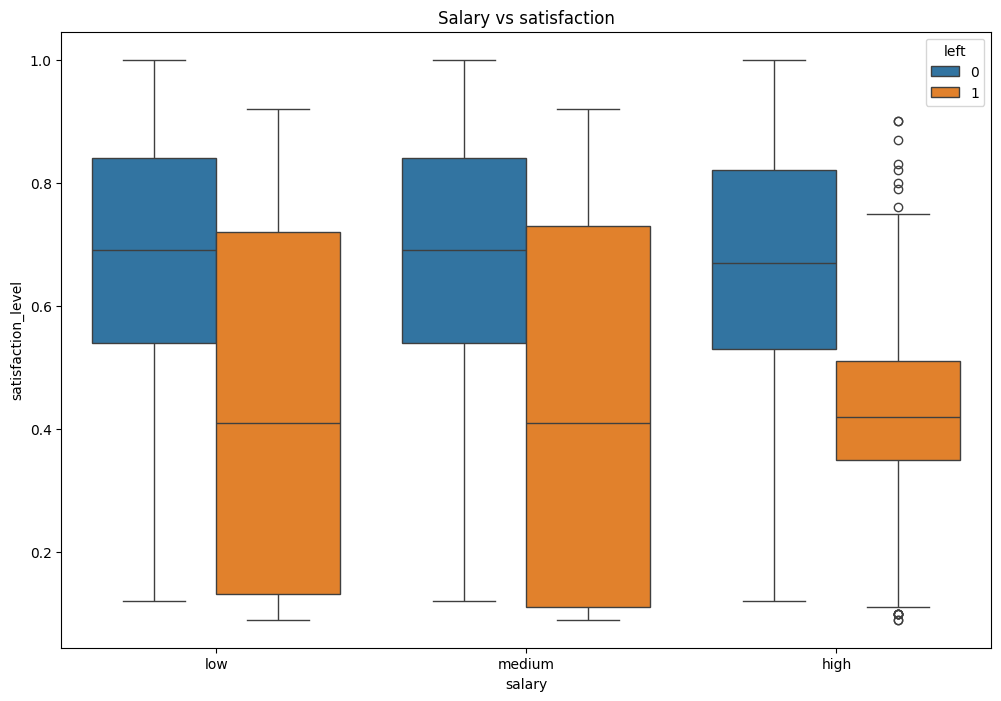

In [103]:
# Create a plot as needed
plt.figure(figsize=(12,8))
sns.boxplot(data=df1, x='salary', y='satisfaction_level', hue='left')
plt.title('Salary vs satisfaction')
plt.show()


* Those who leave tend to have lower satasfaction level regardless of their salary with almost the same median satisfaction level. However, those with high salaries and have left have relatively lower satisfaction score; it is important to investigate further why those with high salary are less satifsied among those who left.

<Axes: xlabel='salary', ylabel='average_monthly_hours'>

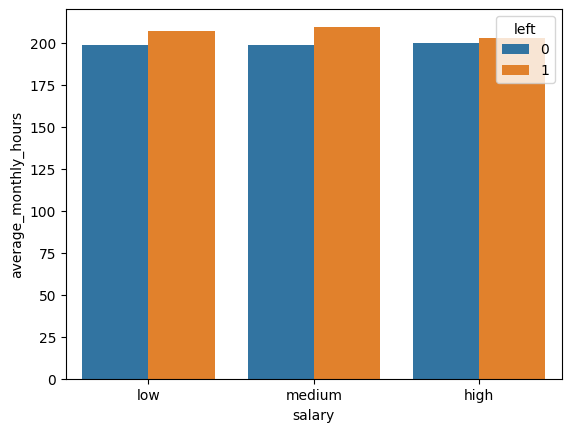

In [133]:
# plot of monthly hours vs salary
sns.barplot(data=df1, x='salary', y='average_monthly_hours', hue='left', errorbar=None)

The graph shows that those with high salary have relatively lower working hours compare to medium and low salary employees. But the graph shows that those how left have worked more hours compared to those who stayed. This suggests over working may contribute to employees leaving.

The salary variable is an ordinal variable. Let's encode it so that we  can plot a scatterplot between salary and avarage monthly hour.

In [105]:
df1.loc[:, 'salary_code'] = df1['salary'].map({'low': 0, 'medium':1, 'high':2})
df1.head()

C:\Users\TROJAN HORSE\AppData\Local\Temp\ipykernel_13040\999999510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'salary_code'] = df1['salary'].map({'low': 0, 'medium':1, 'high':2})


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,salary_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


According to [Hubstaff](https://hubstaff.com/blog/working-days-in-a-month/#:~:text=has%2021%20days.-,How%20many%20average%20working%20days%20are%20in%20a%20month%3F,to%20176%20hours%20every%20month.), the average normal monthly working hours is between 160 and 176

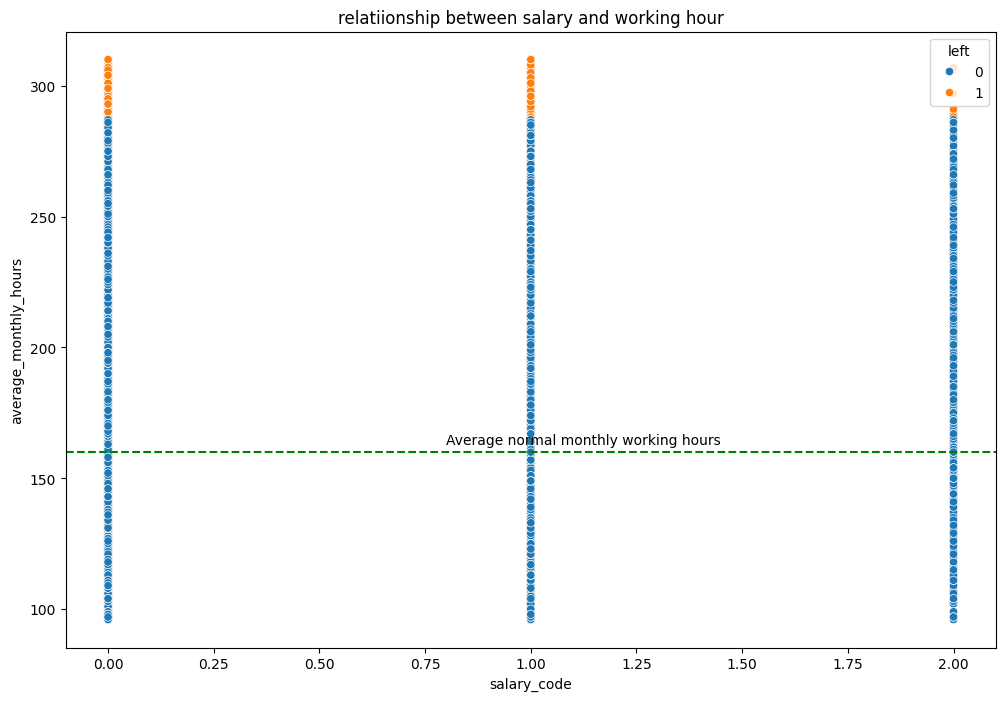

In [106]:
#plot a scatterplot of salary vs monthly hour
plt.figure(figsize=(12,8))
sns.scatterplot(data=df1, x='salary_code', y='average_monthly_hours', hue='left')
plt.axhline(160, ls='--', color='green')
plt.annotate('Average normal monthly working hours', xy=(0.80,163))
plt.title('relatiionship between salary and working hour')
plt.show()

In [107]:
# let's get minimum working hours for those who left
df1.groupby(by='left')['average_monthly_hours'].max()

left
0    287
1    310
Name: average_monthly_hours, dtype: int64

This scatter plots shows that those how left the company worked more hours than those who have stayed. This further comfirms that overworking could be a major contributor to employees quiting. We also see from the above table that the those how have left had maximum average monthly working hours of 310 hours which is arround 10 hours per day.

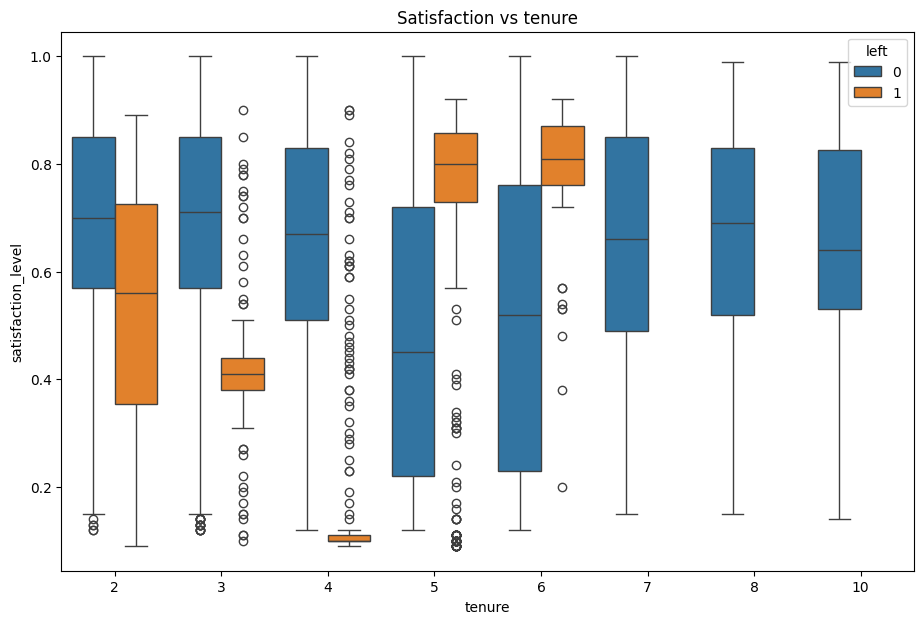

In [108]:
# Create a plot as needed
plt.figure(figsize=(11,7))
plt.title('Satisfaction vs tenure')
sns.boxplot(data=df1, x='tenure', y='satisfaction_level', hue='left')
plt.show()

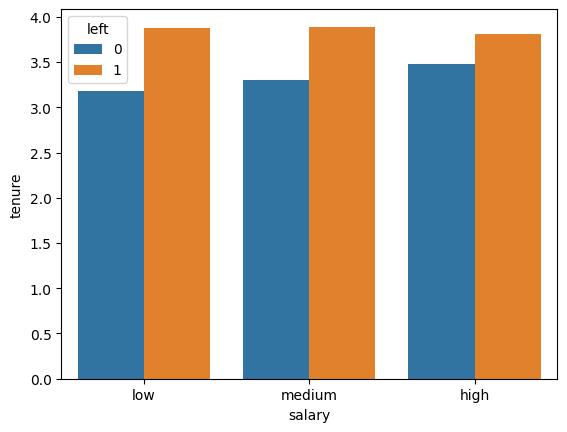

In [109]:
sns.barplot(data=df1, x='salary', y='tenure', hue='left', errorbar=None)
plt.show()

* This graph (boxplot) shows that among new (less than five years) employees the median satisfaction level is lower among those how left than those who stayed. Surprisingly, the median satisfaction level of old employees ( more than five years) is relatively higher in those who left the company compare to those who have stayed; these old employees with higher satisfaction level and still left the company may need to be studied further. Those who left have spent less than 7 years at the company. From the bargraph, those who left tend to have stayed longer than those who have stayed regardless of the salary scale.

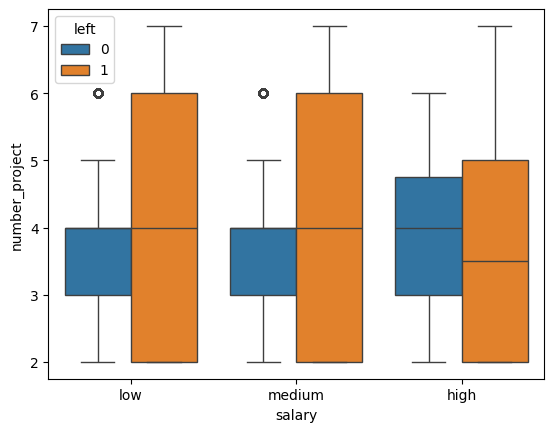

In [110]:
# Create a plot as needed
sns.boxplot(data=df1, x='salary', y='number_project', hue='left')
plt.show()


* This graph show that those who leave tend to accomplish same number of projects regardless of their salary. However, those in higher salary have lower median number of projects accomplished in their tenure before leaving.

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_monthly_hours           -0.006252         0.264678        0.331516   
tenure                          -0.152915         0.096829        0.188837   
salary_code                      0.029241        -0.015775       -0.000502   

                       average_monthly_hours    tenure  salary_code  
satisfaction_level                 -0.006252 -0.152915     0.029241  
last_evaluation                     0.264678  0.096829    -0.015775  
number_project                      0.331516  0.188837    -0.000502  
average_monthly_hours               1.000000  0.102875    -0.000551  
tenure                              0.102875  1.000000     0.038164  
salary_code                      

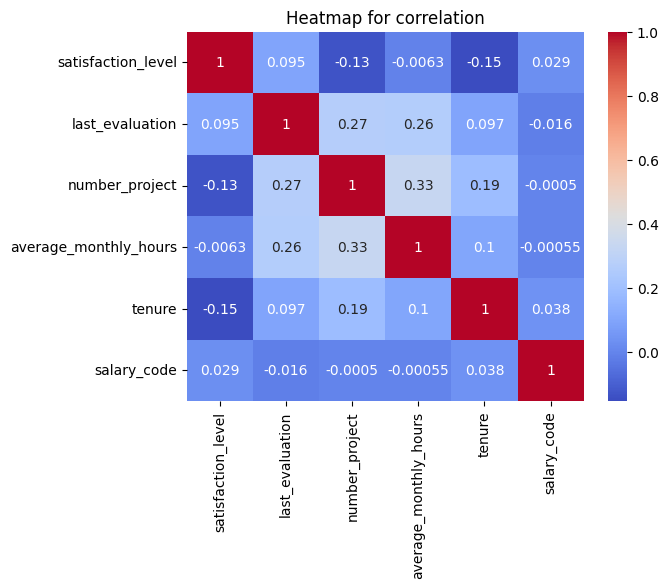

In [111]:
# Create a plot as needed
# get corration matrix
corr_matrix = df1.drop(['department', 'salary', 'left', 'work_accident', 'promotion_last_5years'], axis=1).corr()
print(corr_matrix)
plt.title('Heatmap for correlation')
sns.heatmap(data=corr_matrix,cmap='coolwarm', annot=True)
plt.show()


* This heatmap shows that some feature have weak correlation with each other, for example, average_monthly_hours and number of projects have a pearson coefficient of 0.3.

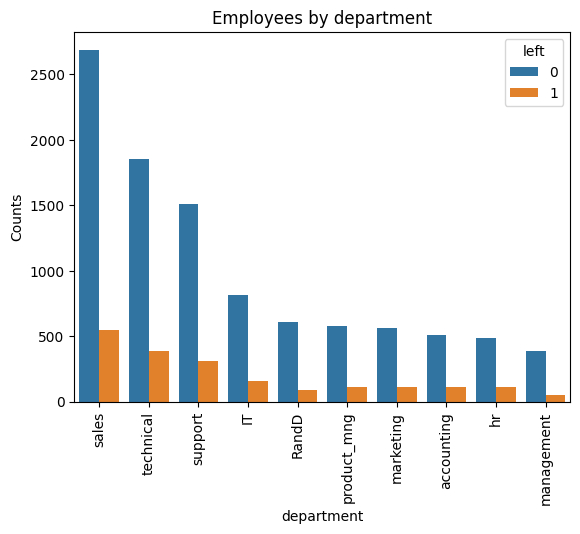

In [112]:
# Create a plot as needed
empl_department = df1.groupby('left')['department'].value_counts().reset_index(name='Counts')
empl_department
sns.barplot(data=empl_department, x='department', y='Counts', hue='left')
plt.title('Employees by department')
plt.xticks(rotation= 90)
plt.show()

* This graph shows that the proportion of which employees leave the company is almost the same accross all department. The graph also shows that sales the partment has the most number of employees and management has the fewest number of employees.

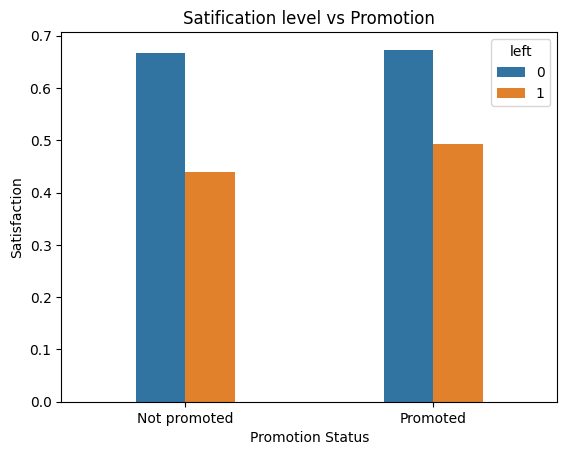

In [113]:
# Create a plot as needed
sns.barplot(data=df1, x=df1['promotion_last_5years'].map({1: 'Promoted', 0: 'Not promoted'}), y='satisfaction_level', hue='left', width=0.4, errorbar=None,)
plt.title('Satification level vs Promotion')
plt.ylabel('Satisfaction')
plt.xlabel('Promotion Status')
plt.show()

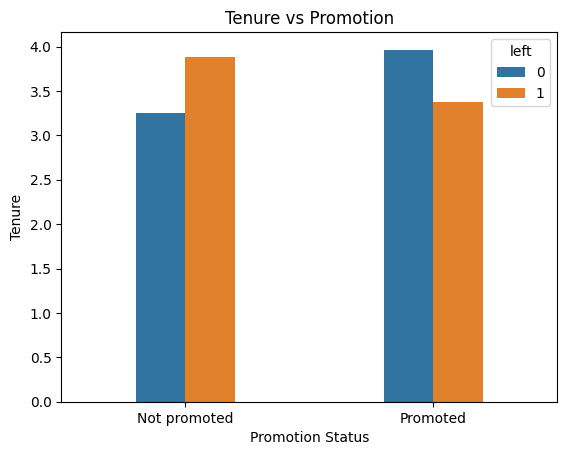

In [114]:
# Create a plot as needed

sns.barplot(data=df1, x=df1['promotion_last_5years'].map({1: 'Promoted', 0: 'Not promoted'}), y='tenure', hue='left', width=0.4, errorbar=None,)
plt.title('Tenure vs Promotion')
plt.ylabel('Tenure')
plt.xlabel('Promotion Status')
plt.show()

This graph shows that those who stayed longer and not promoted tend to leave; while among those who are promoted and have longer tenure tend to stay. The promoted employees who left have a tenure that correspond to the tenure of unpromoted employees who stayed. This may mean that employees expects to be promoted at three years and when that doesn't happen they leave the company.

### Insights

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Type of prediction task is classification

### Identify the types of models most appropriate for this task.

* Classification model like random forest or logisti regression is appropriate for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [115]:
### YOUR CODE HERE ###
# import libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics

In [116]:
# drop salary colum since we already have a salary code column
df_mod = df1.drop('salary', axis=1)
df_dummied= pd.get_dummies(df_mod, drop_first=True)
df_dummied.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_code,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [117]:
# identify dependent and independent variables
y = df_dummied['left']
x = df_dummied.drop('left', axis=1)
# split to test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=42)


In [118]:
# cross validate
clf = RandomForestClassifier(random_state=42)
cv_params = { 'max_depth': [40, 50, 100, None],
          'min_samples_split': [0.08, 0.01, 0.05],
          'min_samples_leaf':[0.2, 0.5, 8],
          'n_estimators': [100,300] 
}
scoring = ('accuracy', 'recall', 'precision', 'f1')

#rf_cv = GridSearchCV(clf,
                    # cv_params,
                     #cv=7, 
                     #scoring=scoring,
                     #refit='f1')

In [119]:
%%time
# fit the model
#rf_cv.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


Let's pickle our model

In [120]:
import pickle as pickle

In [121]:

# Initialize path (save location)
path = 'C:\\Users\\TROJAN HORSE\\Downloads\\Video\DATA SCIENCE-GOOGLE\\capstone\\module2\\capstone_project\\project\\'
# open to write
#with open(path + 'rf' + '.pickle', 'wb') as to_write:
    #pickle.dump(rf_cv, to_write)

In [122]:
def read_pickle(model_name:str, path:str):
    with open(path + model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model
    

In [136]:
# get best estimator
rf_cv = read_pickle('rf', path)
rf = rf_cv.best_estimator_
rf_cv.best_params_


{'max_depth': 40,
 'min_samples_leaf': 8,
 'min_samples_split': 0.01,
 'n_estimators': 100}

In [124]:
# get best score
rf_cv.best_score_

0.937471268905447

In [125]:
# fit best estimator to the test data
y_pred = rf.predict(x_test)

In [126]:
# define a helper function that will return a dataframe of score
def get_results(model_name:str, model_obj, metric:str):
    metrics_dict = {
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy',
        'precision': 'mean_test_accuracy',
        'recall': 'mean_test_accuracy'
    }
    # get all cv results
    cv_results = pd.DataFrame(model_obj.cv_results_)
    best_results = cv_results.iloc[cv_results[metrics_dict[metric]].idxmax(),:]
    # extract score
    accuracy = best_results.mean_test_accuracy
    precision = best_results.mean_test_precision
    recall = best_results.mean_test_recall
    f1 = best_results.mean_test_f1
    table = pd.DataFrame(
        {'Model': [model_name],
        'Precision': [precision],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'f1': [f1]
        }
        
    )
    return table

In [127]:
# get results from cv best estimator
results_train = get_results('Random Forest CV', rf_cv, 'f1')
results_train

,Model,Precision,Accuracy,Recall,f1
0,Random Forest CV,0.979624,0.980102,0.898844,0.937471


In [128]:
# define function to get score after testing the model
def get_score(model_name:str, model_obj, x_test, y_test):
    # get predicted values
    y_pred = model_obj.best_estimator_.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    table = pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'f1': [f1]
    })
    return table

In [129]:
# evaluate model with test data
result_test = get_score('Random Forest test', rf_cv, x_test, y_test)
result_test

,Model,Precision,Accuracy,Recall,f1
0,Random Forest test,0.980287,0.983046,0.916248,0.947186


In [130]:
# lets combine the two tables
combined_results = pd.concat([results_train, result_test])
combined_results

,Model,Precision,Accuracy,Recall,f1
0,Random Forest CV,0.979624,0.980102,0.898844,0.937471
0,Random Forest test,0.980287,0.983046,0.916248,0.947186


Let check the important features.

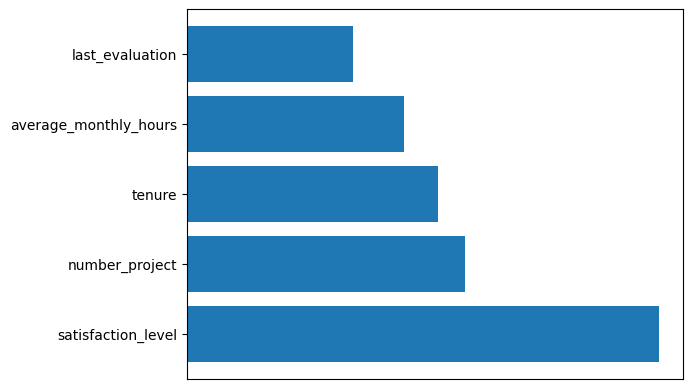

In [131]:
features = x.columns
importance = rf.feature_importances_
importance_df = pd.DataFrame({'Features': features, 'Importance': importance})
# let's sort values
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df_5 = importance_df[:5]
# plot important features
plt.barh(importance_df_5['Features'],importance_df_5['Importance'])
plt.xticks([])

plt.show()

According to our model, the most imporatant features are `satisfaction_leve`, `number_project`, `tenure`, `average_monthly_hours`, and `last_valuation`. These features are important determinants of wether an employee is going to leave or stay at the company.

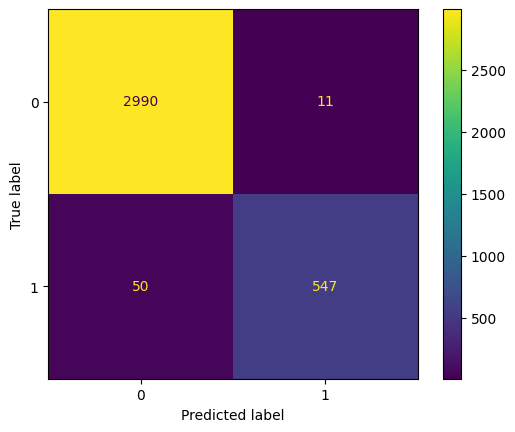

In [132]:
# plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
displ = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
displ.plot()

* The random forest model performed very well in both training and test data. The model predicts more false negative which means some employees may be identified as not going to leave while they may leave but this is significantly low. The model also predicted more true negatives which is expected since our target variable was not balanced.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* Satisfaction level, number of projects, tenure and average monthly hours are the most important feature that determine employee leaving the company. The model demonstrates a strong ability to identify employees who leave the company. It achieved a precision of 0.98, indicating that for every 100 employees predicted to leave, 98 actually left. Additionally, the model has a recall of 0.91, meaning it captured 91% of the employees who actually left the company. <br>

`Business recommendation` <br>
* Focus on employee satisfaction and work-life balance. This is because satisfaction level is the most important feature that determine employee departure according to our model; the model also identified number of projects and average monthly hours as the most important feature. Focus should be made to employees with lower satisfaction level, long monthly working hours, large number of projects and new employees as these are the most important parameters that determines employee's departure.

`Recommendations`<br>
* satisfaction level is the most important feature; this means employees with low satisfaction level are likely to leave. It is important to initiate strategies to improve employees' statisfaction. As number of projects is one of the determining features it is important to initiate strategies that will equally distribute projects to reduce work loads to some employees. The model also shows that employees who work more hours are likely to leave this may be a sign of burnout; it is crutual to discourage excessive working hours.

The model performed very well; it is possible to improve the scores by hyperparameter tuning or by trying another ML algorithms but with these score the model is just fine.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The model has an accuracy of 0.98, precision of 0.98, recall of 0.92 and f1 score of 0.95. This means, with the precision of 0.98 the model identies 98% of employees who are predicted to leave and 91% (recall of 0.91) were  correctly predicted.

### Conclusion, Recommendations, Next Steps
The feature importance confirmed that the employees are overworked and are not satisfied.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.